In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [23]:
airline = pd.read_csv("airlines.csv")
 

In [24]:
airline.head()

,Unnamed: 0,id,Gender,Customer,Age,Type,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20,satisfied


In [25]:
airline.drop(['id','Class','Customer','Type', 'Arrival Delay in Minutes','Unnamed: 0', 'Flight Distance','Departure Delay in Minutes', 'Age'], axis=1, inplace=True)

In [26]:
airline.Gender = airline.Gender.map({'Male': 0, 'Female': 1})

In [27]:
airline.head()

,Gender,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,1,5,4,3,4,3,4,3,5,5,5,5,2,5,5,satisfied
1,1,1,1,3,1,5,4,5,4,4,4,4,3,4,5,satisfied
2,0,2,0,2,4,2,2,2,2,4,1,3,2,2,2,neutral or dissatisfied
3,0,0,0,0,2,3,4,4,1,1,1,1,3,1,4,satisfied
4,1,2,3,4,3,4,1,2,2,2,2,2,4,2,4,satisfied


In [28]:
airline.satisfaction = airline.satisfaction.map({'satisfied': 0, 'neutral or dissatisfied': 1})

In [29]:
airline.head()

,Gender,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,1,5,4,3,4,3,4,3,5,5,5,5,2,5,5,0
1,1,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0
2,0,2,0,2,4,2,2,2,2,4,1,3,2,2,2,1
3,0,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0
4,1,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0


In [30]:
y = airline.satisfaction.copy()
x = airline.drop(['satisfaction'], axis=1)

In [31]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: satisfaction, dtype: int64

In [32]:
x.head()

,Gender,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,1,5,4,3,4,3,4,3,5,5,5,5,2,5,5
1,1,1,1,3,1,5,4,5,4,4,4,4,3,4,5
2,0,2,0,2,4,2,2,2,2,4,1,3,2,2,2
3,0,0,0,0,2,3,4,4,1,1,1,1,3,1,4
4,1,2,3,4,3,4,1,2,2,2,2,2,4,2,4


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)

In [34]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='lbfgs', max_iter=400)

In [35]:
airline = airline.reset_index()

In [36]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [37]:
airline.head()

,index,Gender,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,0,1,5,4,3,4,3,4,3,5,5,5,5,2,5,5,0
1,1,1,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0
2,2,0,2,0,2,4,2,2,2,2,4,1,3,2,2,2,1
3,3,0,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0
4,4,1,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0


In [38]:
y_pred = pd.Series(model.predict(x_test))
y_test = y_test.reset_index(drop=True)
p = pd.concat([y_test, y_pred], axis=1)
p.columns = ['True', 'Prediction']
p.head()

,True,Prediction
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0


In [39]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7272727272727273


Text(0.5, 15.0, 'Predicted')

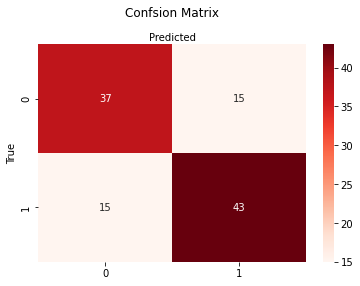

In [40]:
matrix = metrics.confusion_matrix(y_test, y_pred)
labels = [0,1]
fig, ax = plt.subplots()
marks = np.arange(len(labels))
plt.xticks(marks, labels)
plt.yticks(marks, labels)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="Reds", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confsion Matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [41]:
airline = pd.read_csv("airlines.csv")
airline.head()

,Unnamed: 0,id,Gender,Customer,Age,Type,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20,satisfied


In [42]:
airline.Gender = airline.Gender.map({'Male': 0, 'Female': 1})
airline.Customer = airline.Customer.map({'Loyal Customer': 0, 'disloyal Customer': 1})
airline.Class = airline.Class.map({'Eco': 0, 'Eco Plus': 1, 'Business': 2})
airline.Type = airline.Type.map({'Business travel': 0, 'Personal Travel': 1})
airline.satisfaction = airline.satisfaction.map({'satisfied': 0, 'neutral or dissatisfied': 1})

In [43]:
airline.drop(['id','Arrival Delay in Minutes','Unnamed: 0', 'Flight Distance','Departure Delay in Minutes', 'Age'], axis=1, inplace=True)

In [44]:
y = airline.satisfaction.copy()
x = airline.drop(['satisfaction'], axis=1)

In [45]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: satisfaction, dtype: int64

In [46]:
x.head()

,Gender,Customer,Type,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,1,0,0,0,5,4,3,4,3,4,3,5,5,5,5,2,5,5
1,1,0,0,2,1,1,3,1,5,4,5,4,4,4,4,3,4,5
2,0,1,0,0,2,0,2,4,2,2,2,2,4,1,3,2,2,2
3,0,0,0,2,0,0,0,2,3,4,4,1,1,1,1,3,1,4
4,1,0,0,0,2,3,4,3,4,1,2,2,2,2,2,4,2,4


In [47]:
airline.head()

,Gender,Customer,Type,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,1,0,0,0,5,4,3,4,3,4,3,5,5,5,5,2,5,5,0
1,1,0,0,2,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0
2,0,1,0,0,2,0,2,4,2,2,2,2,4,1,3,2,2,2,1
3,0,0,0,2,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0
4,1,0,0,0,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0


In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)

In [49]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='lbfgs', max_iter=400)

In [50]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [51]:
y_pred = pd.Series(model.predict(x_test))
y_test = y_test.reset_index(drop=True)
table = pd.concat([y_test, y_pred], axis=1)
table.columns = ['True', 'Prediction']
table.head()

,True,Prediction
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0


In [52]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8818181818181818


Text(0.5, 15.0, 'Predicted')

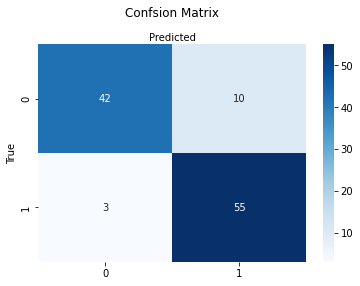

In [53]:
matrix = metrics.confusion_matrix(y_test, y_pred)
labels = [0,1]
fig, ax = plt.subplots()
marks = np.arange(len(labels))
plt.xticks(marks, labels)
plt.yticks(marks, labels)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="Blues", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confsion Matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')